In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import plotly.express as px

In [2]:
df = pd.read_csv('raw_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
from skimpy import skim
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 614    │ │ object      │ 8     │                                    │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing ┃ complete   ┃ mean ┃ sd   ┃ p0  ┃ p25  ┃ p75  ┃ p100  ┃ hist   ┃  │
│ ┃            ┃         ┃ rate       ┃      ┃      ┃     ┃      ┃      ┃       ┃        ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ ApplicantI │       0 │          1 │ 5400 │ 6100 │ 150 │ 2900 │ 5800 │ 81000 │   █    │  │
│ │ ncome      │         │            │      │      │     │      │      │       │        │  │
│ │ Coapplican │       0 │          1 │ 1600 │ 2900 │   0 │    0 │ 2300 │ 42000 │   █    │  │
│ │ tIncome    │         │            │      │      │     │      │      │       │        │  │
│ │ LoanAmount │      22 │       0.96 │  150 │   86 │   9 │  100 │  170 │   700 │  █▇▁   │  │
│ │ Loan_Amoun │      14 │       0.98 │  340 │   65 │  12 │  360 │  360 │   480 │   ▁ █  │  │
│ │ t_Term     │         │            │      │      │     │      │      │       │        │  │
│ │ Credit_His │      50 │       0.92 │ 0.84 │ 0.36 │   0 │    1 │    1 │     1 │ ▁    █ │  │
│ │ tory       │         │            │      │      │     │      │      │       │        │  │
│ └────────────┴─────────┴────────────┴──────┴──────┴─────┴──────┴──────┴───────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [4]:
missing_values = (
    df.isnull().sum()/len(df)*100
).astype(int)
print(f'Columns\t\t\t% missing')
print(f'{"-"}'*35)
missing_values

Columns			% missing
-----------------------------------


Loan_ID              0
Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           3
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

In [5]:
Income_Features= ['ApplicantIncome','CoapplicantIncome']
Loan_Features = ['LoanAmount','Loan_Amount_Term']
Income_df = df[Income_Features]
Loan_df = df[Loan_Features]
Income_df

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0
3,2583,2358.0
4,6000,0.0
...,...,...
609,2900,0.0
610,4106,0.0
611,8072,240.0
612,7583,0.0


In [6]:
Loan_df

,LoanAmount,Loan_Amount_Term
0,NaN,360.0
1,128.0,360.0
2,66.0,360.0
3,120.0,360.0
4,141.0,360.0
...,...,...
609,71.0,360.0
610,40.0,180.0
611,253.0,360.0
612,187.0,360.0


In [7]:
for col in Loan_df.columns:

    Loan_df[col].fillna(

        # select column
        Loan_df[col]
        # drop nan
        .dropna()
        # calculate the mean
        .mean()
        )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


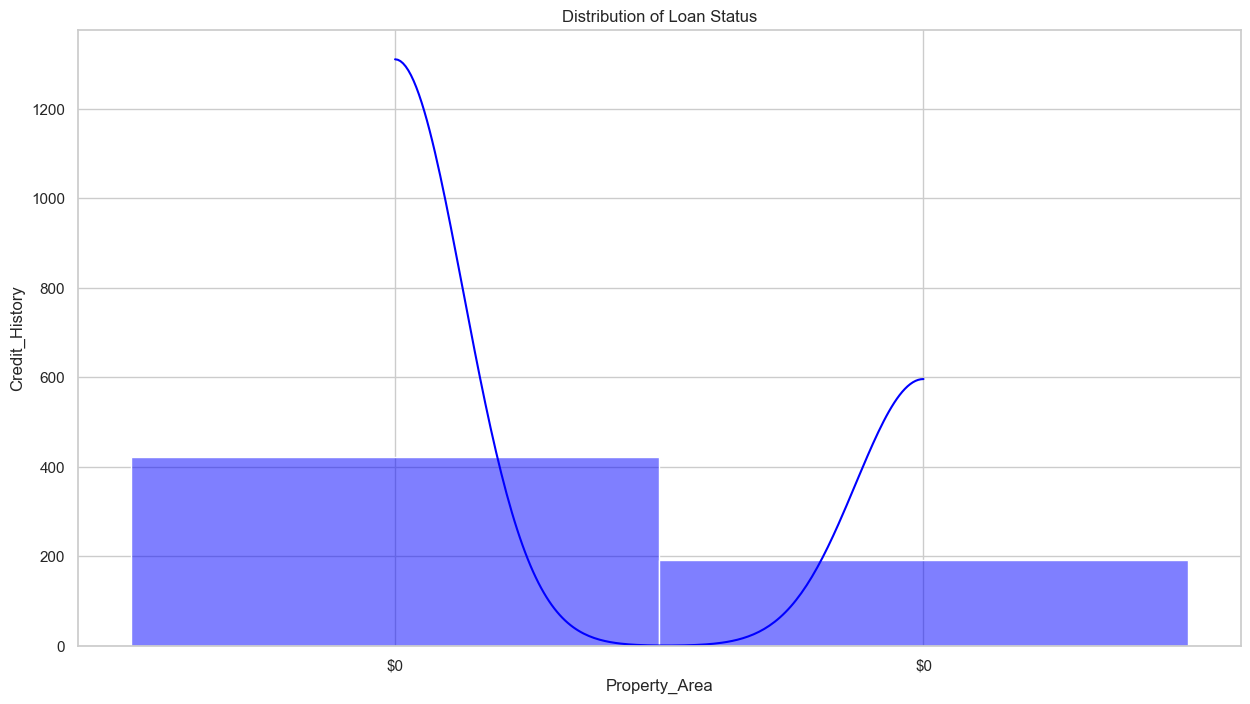

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.histplot(df["Loan_Status"], kde=True, color="blue")

# Adding labels and title
plt.xlabel("Property_Area")
plt.ylabel("Credit_History")
plt.title("Distribution of Loan Status")

# Format x-axis labels to display prices in "$100,000" format (BONUS)
def price_formatter(x, pos):
    return f"${int(x/1000):}"

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))

plt.show()

In [9]:
feature_cardinality = df.select_dtypes("object").nunique()
feature_cardinality

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [10]:
corr_df = df.select_dtypes("number").corr()
corr_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [11]:
fig = px.imshow(corr_df, color_continuous_scale='Spectral')
fig.update_layout(title='Heat Map: Correlation of Features', font=dict(size=12))
fig.show();

In [13]:
# Drop features with high collinearity
df.drop(columns=['ApplicantIncome','LoanAmount'], inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(3), object(8)
memory usage: 52.9+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1508.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2358.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.0,360.0,1.0,Urban,Y


In [15]:
target = "Loan_Status"
features = df.columns.drop(target)
x = df[features]
y= df[target]

In [16]:
from sklearn.model_selection import train_test_split

# split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print(y.head())

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object


In [18]:
y_mean = (y_train.mean())

y_pred_baseline = [y_mean]*len(y_train)


TypeError: no numeric data to plot